In [6]:
from IPython.display import Image
import numpy as np

# Clustering with scikit-learn

## Introduction
Nella sezione **Clustering**, verranno utilizzati metodi di apprendimento non supervisionato, ovvero metodi per estrarre informazioni dettagliate da set di dati non etichettati. In particolare, si imparerà a conoscere diversi algoritmi di **clustering** e come sono in grado di raggruppare osservazioni di dati simili.

### Unsupervised learning
Finora, sono stati utilizzati solo metodi di apprendimento supervisionato, poiché abbiamo avuto a che fare esclusivamente con set di dati etichettati. Tuttavia, nel mondo reale molti set di dati sono completamente privi di etichetta, poiché l'etichettatura dei set di dati comporta ulteriore lavoro e lungimiranza. Piuttosto che ignorare tutti questi set di dati non etichettati, si può comunque estrarre informazioni significative utilizzando l'apprendimento non supervisionato.
<br><br>
Poiché ci sono solo osservazioni di dati con cui lavorare e nessuna etichetta, i metodi di apprendimento non supervisionato sono incentrati sulla ricerca di somiglianze/differenze tra le osservazioni dei dati e sulla formulazione di inferenze basate su tali risultati. 
- La forma più comunemente usata di apprendimento non supervisionato è **il clustering**. Come suggerisce il nome, gli algoritmi di clustering raggrupperanno i dati in gruppi distinti (cluster), in cui ogni cluster è costituito da osservazioni di dati simili.

Il clustering viene utilizzato in molte applicazioni diverse:
- dal rilevamento delle anomalie (cioè il rilevamento di dati reali rispetto a quelli fraudolenti) 
- alle ricerche di mercato (ad esempio raggruppando i clienti in base alla cronologia degli acquisti). 

Nei prossimi capitoli, si imparerà a conoscere una varietà di algoritmi di clustering comunemente usati nella data science, nonché altri strumenti per trovare somiglianze tra le osservazioni dei dati.

## Cosine Similarity
### What defines similarity?
Per trovare somiglianze tra le osservazioni dei dati, dobbiamo prima capire come misurare effettivamente la somiglianza. La misura più comune della somiglianza è la metrica di `somiglianza del coseno`.
<br><br>
Un'osservazione dei dati con caratteristiche numeriche è essenzialmente solo un vettore di numeri reali. La `somiglianza del coseno` è usata in matematica come metrica di somiglianza per i vettori a valori reali, quindi ha senso usarla come metrica di somiglianza per le osservazioni dei dati. 
- La somiglianza del coseno per due osservazioni di dati è un numero compreso tra -1 e 1. 
- Misura specificamente la somiglianza **proporzionale** dei valori delle caratteristiche tra le due osservazioni dei dati (cioè il rapporto tra le colonne delle caratteristiche).

I valori di somiglianza del coseno più vicini a `1`
- rappresentano una maggiore somiglianza tra le osservazioni, 

mentre i valori più vicini a `-1` 
- rappresentano una maggiore divergenza. 

Un valore pari a `0`
- significa che le due osservazioni dei dati non hanno correlazione (né simile né dissimile).

### Calculating cosine similarity
La `somiglianza del coseno` per due vettori, u e v viene calcolata come `prodotto scalare` tra la normalizzazione L2 dei vettori. La formula esatta per la somiglianza del coseno è:

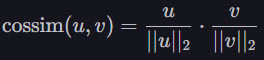

In [4]:
Image("somiglianza_coseno.png")

- dove `||u||2` rappresenta la normalizzazione L2 di `u` 
- e `||v||2` rappresenta la normalizzazione L2 `v`.

In scikit-learn, la `somiglianza del coseno` viene implementata tramite la funzione `cosine_similarity` (che fa parte del modulo `metrics.pairwise`). Calcola le somiglianze del coseno per coppie di osservazioni di dati in un singolo set di dati o coppie di osservazioni di dati tra due set di dati.
<br><br>
Il codice seguente calcola le somiglianze del coseno tra coppie di osservazioni in un set di dati 2-D.

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
data = np.array([
  [ 1.1,  0.3],
  [ 2.1,  0.6],
  [-1.1, -0.4],
  [ 0. , -3.2]])

In [8]:
cos_sims = cosine_similarity(data)
print('{}\n'.format(repr(cos_sims)))

array([[ 1.        ,  0.99992743, -0.99659724, -0.26311741],
       [ 0.99992743,  1.        , -0.99751792, -0.27472113],
       [-0.99659724, -0.99751792,  1.        ,  0.34174306],
       [-0.26311741, -0.27472113,  0.34174306,  1.        ]])



Quando si passa un solo set di dati in `cosine_similarity`, la funzione calcolerà le somiglianze del coseno tra coppie di osservazioni all'interno del set di dati. 
- Nel codice sopra, è stato passato i dati (che contengono 4 osservazioni di dati), quindi l'output di `cosine_similarity` è una matrice 4x4 di valori di somiglianza del coseno.

Il valore all'indice (i, j) di `cos_sims` è la somiglianza del coseno tra le osservazioni dei dati i e j in `data`. Poiché la somiglianza del coseno è **simmetrica**, l'array `cos_sims` contiene gli stessi valori all'indice (i, j) e (j, i).
<br><br>
Si noti che la somiglianza del coseno tra un'**osservazione dei dati e se stessa** è `1`, a meno che l'osservazione dei dati non contenga solo 0 come valori delle caratteristiche (nel qual caso la somiglianza del coseno è 0).
<br><br>
Se si decidesse di passare due set di dati (con un numero uguale di colonne) in `cosine_similarity`, la funzione calcolerà le somiglianze del coseno per coppie di osservazioni di dati tra i due set di dati.

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
data = np.array([
  [ 1.1,  0.3],
  [ 2.1,  0.6],
  [-1.1, -0.4],
  [ 0. , -3.2]])

data2 = np.array([
  [ 1.7,  0.4],
  [ 4.2, 1.25],
  [-8.1,  1.2]])

In [11]:
cos_sims = cosine_similarity(data, data2)
print('{}\n'.format(repr(cos_sims)))

array([[ 0.9993819 ,  0.99973508, -0.91578821],
       [ 0.99888586,  0.99993982, -0.9108828 ],
       [-0.99308366, -0.9982304 ,  0.87956492],
       [-0.22903933, -0.28525359, -0.14654866]])



Nel codice sopra, il valore all'indice (i, j) di `cos_sims` è la somiglianza del coseno tra l'osservazione dei dati i in `data` e l'osservazione dei dati j nei `data2`. 
- Si noti che `cos_sims` è un array 4x3, poiché `data` contiene 4 osservazioni di dati e `data2` ne contiene 3.

### Time to Code!
L'esercizio consisterà nell'usare la funzione `cosine_similarity` per calcolare le osservazioni di dati più simili per ciascuna osservazione di dati in `data`. Sia `cosine_similarity` che `data` vengono importati/inizializzati nel back-end.
<br><br>
Innanzitutto, bisogna calcolare le somiglianze del coseno a coppie per ciascuna osservazione di dati.

- Setta `cos_sims` uguale a `cosine_similarity` applicata a `data`.

In [12]:
# cos_sims = cosine_similarity(data)

La diagonale in `cos_sims` rappresenta le somiglianze tra ogni osservazione e se stessa. Si sotituirà ogni valore diagonale con `0`, in modo che per ogni osservazione di dati si trovi l'osservazione più simile oltre a se stessa.
<br><br>
In NumPy, la funzione `fill_diagonal` consente di riempire la diagonale di un array con un valore specificato.

- Setta `np.fill_diagonal` con `cos_sims` come primo argomento e `0` come secondo argomento.

In [13]:
# np.fill_diagonal(cos_sims, 0)

Per ogni riga di `cos_sims`, la colonna contenente il punteggio di similarità del coseno più grande rappresenta l'osservazione dei dati più simile. Si possono trovare gli indici di colonna con il valore più grande usando la funzione `argmax` di `cos_sims`.
<br><br>
Si setti l'argomento della keyword `axis` uguale a `1` per specificare gli indici di colonna più grandi per ogni riga.
- Setta `similar_indexes` uguale all'output di `cos_sims.argmax` con l'argomento della keyword `axis` uguale a `1`.

In [14]:
# similar_indexes = cos_sims.argmax(axis=1)

## Nearest Neighbors
### Finding the nearest neighbors
Nel Capitolo 1, è stato menzionato che il clustering è un metodo per raggruppare insieme osservazioni di dati simili. 
- Un altro metodo per trovare osservazioni di dati simili è l'approccio dei `nearest neighbors approach`. Con questo approccio, si trovano le `k` osservazioni di dati più simili (cioè vicini) per una data osservazione di dati (dove k rappresenta il numero di vicini).

In scikit-learn, si implementa l'approccio dei vicini più vicini con l'oggetto `NearestNeighbors` (parte del modulo `neighbors`).

- Il codice seguente trova i 5  nearest neighbors per una nuova osservazione dei dati (`new_obs`) in base al suo set di dati adattato (`data`).

In [15]:
data = np.array([
  [5.1, 3.5, 1.4, 0.2],
  [4.9, 3. , 1.4, 0.2],
  [4.7, 3.2, 1.3, 0.2],
  [4.6, 3.1, 1.5, 0.2],
  [5. , 3.6, 1.4, 0.2],
  [5.4, 3.9, 1.7, 0.4],
  [4.6, 3.4, 1.4, 0.3],
  [5. , 3.4, 1.5, 0.2],
  [4.4, 2.9, 1.4, 0.2],
  [4.9, 3.1, 1.5, 0.1]])

In [16]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors()
nbrs.fit(data)
new_obs = np.array([[5. , 3.5, 1.6, 0.3]])
dists, knbrs = nbrs.kneighbors(new_obs)

In [17]:
# nearest neighbors indexes
print('{}\n'.format(repr(knbrs)))

array([[7, 4, 0, 6, 9]], dtype=int64)



In [18]:
# nearest neighbor distances
print('{}\n'.format(repr(dists)))

array([[0.17320508, 0.24494897, 0.24494897, 0.45825757, 0.46904158]])



In [19]:
only_nbrs = nbrs.kneighbors(new_obs,
                            return_distance=False)
print('{}\n'.format(repr(only_nbrs)))

array([[7, 4, 0, 6, 9]], dtype=int64)



L'oggetto `NearestNeighbors` è dotato di un set di dati, che viene quindi utilizzato come pool di possibili vicini per nuove osservazioni di dati. 
<br>
La funzione `kneighbors` prende nuove osservazioni di dati e restituisce i k vicini più vicini insieme alle rispettive distanze dalle osservazioni di dati di input.
<br><br>
Si noti che nearest neighbor sono i vicini con le distanze più piccole dall'osservazione dei dati di input. 
- Si può scegliere di non restituire le distanze impostando l'argomento della keyword `return_distance` su `False`.

Il valore predefinito per k durante l'inizializzazione dell'oggetto `NearestNeighbors` è 5. Si può specificare un nuovo valore utilizzando l'argomento della keyword `n_neighbors`.

In [24]:
data = np.array([
  [5.1, 3.5, 1.4, 0.2],
  [4.9, 3. , 1.4, 0.2],
  [4.7, 3.2, 1.3, 0.2],
  [4.6, 3.1, 1.5, 0.2],
  [5. , 3.6, 1.4, 0.2],
  [5.4, 3.9, 1.7, 0.4],
  [4.6, 3.4, 1.4, 0.3],
  [5. , 3.4, 1.5, 0.2],
  [4.4, 2.9, 1.4, 0.2],
  [4.9, 3.1, 1.5, 0.1]])

In [25]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2)
nbrs.fit(data)
new_obs = np.array([
  [5. , 3.5, 1.6, 0.3],
  [4.8, 3.2, 1.5, 0.1]])
dists, knbrs = nbrs.kneighbors(new_obs)

In [26]:
# nearest neighbors indexes
print('{}\n'.format(repr(knbrs)))

array([[7, 0],
       [9, 2]], dtype=int64)



In [23]:
# nearest neighbor distances
print('{}\n'.format(repr(dists)))

array([[0.17320508, 0.24494897],
       [0.14142136, 0.24494897]])



Nel codice sopra, la prima riga di `knbrs` e `dists` corrisponde alla prima osservazione di dati in `new_obs`, mentre la seconda riga di `knbrs` e `dists` corrisponde alla seconda osservazione in `new_obs`.

## K-Means Clustering
### K-means algorithm
L'idea alla base del clustering dei dati è piuttosto semplice: suddividere un set di dati in gruppi di osservazioni di dati simili. Il modo in cui troviamo questi cluster è un po' più complesso, poiché esistono diversi metodi per raggruppare i set di dati.
- Il metodo di clustering più noto è il `clustering K-means`. L'algoritmo di clustering K-means separerà i dati in K cluster (il numero di cluster è scelto dall'utente) utilizzando mezzi cluster, noti anche come centroidi.

Questi centroidi rappresentano i `"centri"` di ciascun cluster. In particolare, il baricentro di un cluster è uguale alla **media** di tutte le osservazioni dei dati all'interno del cluster.

In [29]:
cluster = np.array([
  [ 1.2, 0.6],
  [ 2.4, 0.8],
  [-1.6, 1.4],
  [ 0. , 1.2]])
print('Cluster:\n{}\n'.format(repr(cluster)))

Cluster:
array([[ 1.2,  0.6],
       [ 2.4,  0.8],
       [-1.6,  1.4],
       [ 0. ,  1.2]])



In [30]:
centroid = cluster.mean(axis=0)
print('Centroid:\n{}\n'.format(repr(centroid)))

Centroid:
array([0.5, 1. ])



L'algoritmo di clustering K-means è un processo iterativo. Ad ogni iterazione, l'algoritmo assegnerà ogni osservazione dei dati al cluster con il baricentro più vicino all'osservazione (usando la metrica della distanza regolare).
<br><br>
Quindi aggiorna ciascun centroide in modo che sia uguale alla nuova media delle osservazioni dei dati nel cluster. 
- Si noti che all'inizio dell'algoritmo, i centroidi del cluster vengono inizializzati in modo casuale o (meglio) inizializzati utilizzando l'algoritmo `K-means++`. Il processo di raggruppamento si interrompe quando non ci sono più modifiche nell'assegnazione del cluster per qualsiasi osservazione dei dati.

Un esempio di clustering `K-means` su un set di dati con 10 cluster scelti (K = 10). 
- I grappoli si distinguono per colore. 
- Le croci bianche rappresentano i centroidi di ciascun cluster.

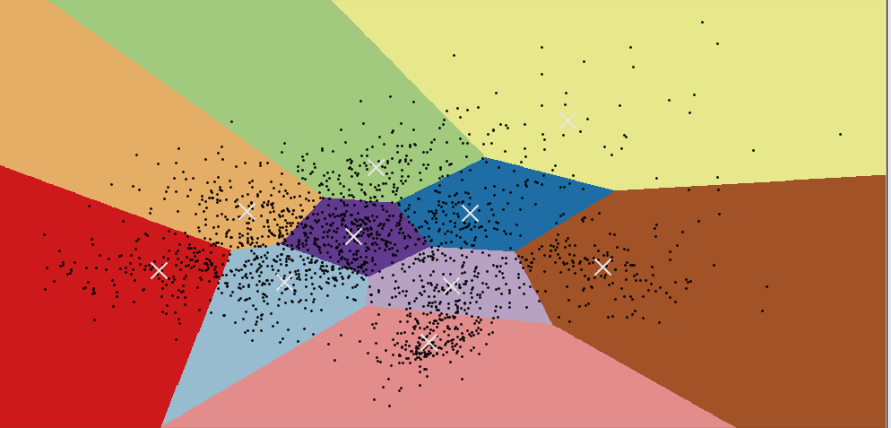

In [31]:
Image("kmeans10.png")

In scikit-learn, il clustering K-means viene implementato usando l'oggetto `KMeans` (parte del modulo `cluster`).
- Il codice seguente mostra come usare l'oggetto `KMeans` (con 3 cluster).

In [34]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3)
## predefined data
# kmeans.fit(data)

In [35]:
## cluster assignments
# print('{}\n'.format(repr(kmeans.labels_)))

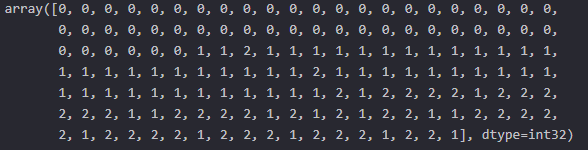

In [40]:
Image("kmeanslabels.png")

In [36]:
## centroids
# print('{}\n'.format(repr(kmeans.cluster_centers_)))

In [41]:
# new_obs = np.array([
#   [5.1, 3.2, 1.7, 1.9],
#   [6.9, 3.2, 5.3, 2.2]])

## predict clusters
# print('{}\n'.format(repr(kmeans.predict(new_obs))))

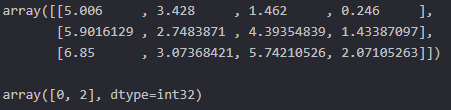

In [42]:
Image("kmeans_centers_predict.png")

L'oggetto `KMeans` utilizza l'inizializzazione del centroide K-means++ per impostazione predefinita. 
<br><br>
L'argomento della keyword `n_clusters` ci consente di impostare il numero di cluster che si vuole. Nell'esempio sopra, è stato applicato il clustering ai dati utilizzando 3 cluster.
<br><br>
L'attributo `labels_` dell'oggetto indica le assegnazioni finali del cluster per ciascuna osservazione dei dati e l E' stata utilizzata`cluster_centers_` rappresenta i centroidi finali. E' stata utilizzata la funzione di previsione per assegnare nuove osservazioni di dati a uno dei cluster.

## Mini-batch clustering
Quando si lavora con set di dati **molto grandi**, il normale `clustering K-means` può essere piuttosto lento. 
- Per ridurre il tempo di calcolo, si può eseguire `mini-batch K-means clustering`, che è solo un normale clustering di K-medie applicato a sottoinsiemi di dati campionati casualmente (mini-batch) alla volta.

C'è un compromesso nell'uso del clustering mini-batch, poiché i risultati potrebbero non essere buoni come il normale clustering K-mean. Tuttavia, in pratica la differenza di qualità è trascurabile, quindi il `mini-batch clustering` è solitamente la scelta quando si tratta di **grandi** set di dati.
<br><br>
In scikit-learn, il `clustering K-means mini-batch` viene implementato utilizzando l'oggetto `MiniBatchKMeans` (anch'esso parte del modulo `cluster`). Viene utilizzato allo stesso modo del normale oggetto `KMeans`, con un argomento aggiuntivo per la keyword `batch_size` durante l'inizializzazione che ci permette di specificare la dimensione di ogni mini-batch.

In [43]:
# from sklearn.cluster import MiniBatchKMeans
# kmeans = MiniBatchKMeans(n_clusters=3, batch_size=10)

## predefined data
# kmeans.fit(data)

In [44]:
## cluster assignments
# print('{}\n'.format(repr(kmeans.labels_)))

In [45]:
## centroids
# print('{}\n'.format(repr(kmeans.cluster_centers_)))

In [46]:
# new_obs = np.array([
#   [5.1, 3.2, 1.7, 1.9],
#   [6.9, 3.2, 5.3, 2.2]])

## predict clusters
# print('{}\n'.format(repr(kmeans.predict(new_obs))))

Si noti che i raggruppamenti possono avere permutazioni diverse, ovvero etichette di cluster diverse (0, 1, 2 contro 1, 2, 0). In caso contrario, le assegnazioni del cluster sia per `KMeans` che per `MiniBatchKMeans` dovrebbero essere relativamente le stesse.

Esempio dei passaggi multipli dell'algoritmo K-Means.
- 1 fase: centroidi inizializzati e punti non cluster

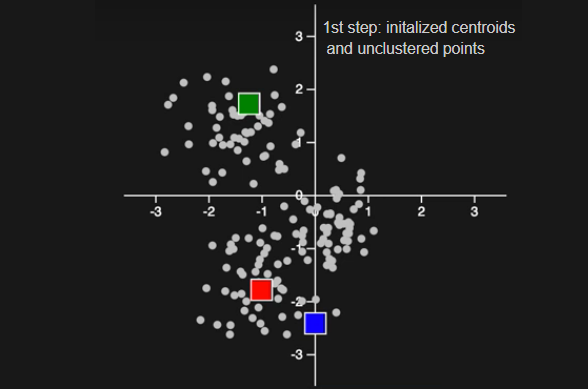

In [48]:
Image("kmeans_step1.png")

- 2 fase: ricalcolare le posizioni dei centroidi e riclassificare
- 3 fase: ricalcolare le posizioni del centroide e riclassificare nuovamente la differenza più evidente è quali punti si trovano nei cluster rosso e blu

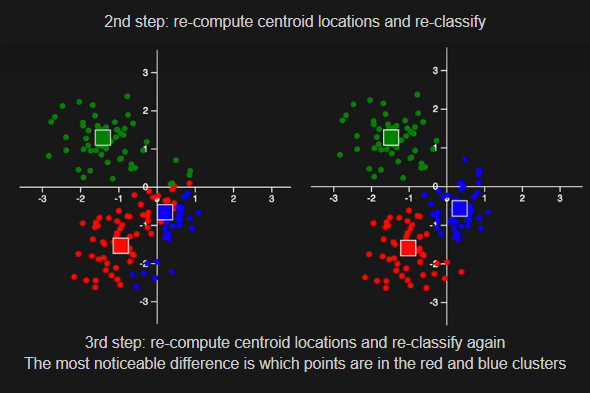

In [51]:
Image("kmeans_step23.png")

### Time to Code!
L'esercizio consisterà nel completare la funzione `kmeans_clustering`, che utilizzerà `KMeans` o `MiniBatchKMeans` per raggruppare `data`.
<br><br>
L'oggetto che si utilizza per il clustering dipende dal valore di `batch_size`.
<br><br>
Se `batch_size` è `None`, setta `kmeans` uguale a `KMeans`, inizializzato con `n_clusters` per l'argomento `n_clusters`. Altrimenti, setta `kmeans` uguale a `MiniBatchKMeans`, inizializzato con `n_clusters` per l'argomento `n_clusters` e `batch_size` per l'argomento `batch_size`.
<br><br>
Dopo aver impostato `kmeans`, lo si adatta ai dati e lo si restituisce.
- Chiama `kmeans.fit` con data come unico argomento e restituire `kmeans`.

In [53]:
def kmeans_clustering(data, n_clusters, batch_size):
    if batch_size is None:
        kmeans = KMeans(n_clusters=n_clusters)
    else:
        kmeans = MiniBatchKMeans(n_clusters=n_clusters,
                                 batch_size=batch_size)
    kmeans.fit(data)
    return kmeans

## Hierarchical Clustering
### K-means vs. hierarchical clustering
Un presupposto principale che l'algoritmo di `clustering K-mean` fa è che il set di dati sia costituito da cluster sferici (cioè circolari). 
- Con questa ipotesi, l'algoritmo `K-mean` creerà gruppi di osservazioni di dati circolari attorno ai centroidi. 

Tuttavia, i dati della vita reale spesso non contengono cluster sferici, il che significa che il clustering K-mean potrebbe finire per produrre cluster imprecisi a causa della sua ipotesi.

- Un'alternativa al `clustering K-means` è il `clustering gerarchico`. Il `clustering gerarchico` ci consente di raggruppare **qualsiasi tipo di dati**, poiché non fa alcuna ipotesi sui dati o sui cluster.

Esistono due approcci al clustering gerarchico: 
- `bottom-up` (divisivo): Inizialmente tratta tutti i dati come un singolo cluster, quindi li divide ripetutamente in cluster più piccoli fino a raggiungere il numero desiderato di cluster.
- e `top-down` (agglomerativo): Inizialmente tratta ogni osservazione di dati come il proprio cluster, quindi unisce ripetutamente i due cluster più simili fino a raggiungere il numero desiderato di cluster.

`Raggruppamento agglomerato` per sette diversi prodotti alimentari in due gruppi finali. Ad ogni passaggio i due cluster più simili vengono uniti.

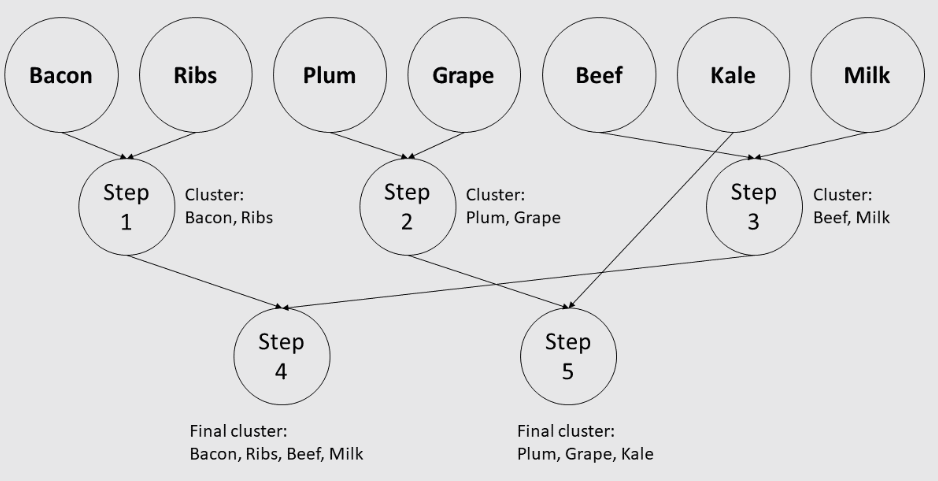

In [54]:
Image("raggruppamento_agglomerato.png")

In pratica, l'approccio agglomerato è più comunemente utilizzato grazie a migliori algoritmi per l'approccio. Pertanto,  questo capitolo si concentrerà sull'utilizzo del clustering agglomerato.

### Agglomerative clustering
In scikit-learn, il `clustering agglomerato` viene implementato tramite l'oggetto `AgglomerativeClustering` (parte del modulo `cluster`). Simile all'oggetto `KMeans` del capitolo precedente, si deve specificare il numero di cluster con l'argomento della keyword `n_clusters`.
- Il codice seguente illustra come usare l'oggetto `AgglomerativeClustering` (con 3 cluster).

In [55]:
# from sklearn.cluster import AgglomerativeClustering
# agg = AgglomerativeClustering(n_clusters=3)

In [56]:
## predefined data
# agg.fit(data)

In [57]:
## cluster assignments
# print('{}\n'.format(repr(agg.labels_)))

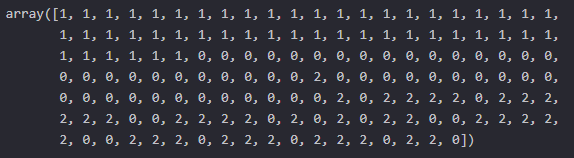

In [58]:
Image("agglomerative_clustering.png")

Poiché il clustering agglomerato **non fa uso di centroidi**, non è presente alcun attributo `cluster_centers_` nell'oggetto `AgglomerativeClustering`. Inoltre, **non esiste una funzione di previsione** per fare previsioni di cluster su nuovi dati:
- poiché il clustering K-means utilizza i suoi centroidi finali per nuove previsioni di dati.

## Mean Shift Clustering
### Choosing the number of clusters
Ciascuno degli algoritmi di clustering che abbiamo utilizzato finora richiede di passare il numero di cluster. Questo va bene se conosciamo già il numero di cluster che vogliamo o abbiamo una buona ipotesi per il numero di cluster. 
- Tuttavia, se non abbiamo una buona idea di quale dovrebbe essere il numero effettivo di cluster per il set di dati, esistono algoritmi che possono `scegliere automaticamente` il numero di cluster per noi.

Uno di questi algoritmi è `mean shift clustering algorithm`. Come l'algoritmo di clustering K-means,`mean shift clustering algorithm` si basa sulla ricerca dei centroidi del cluster. Poiché non forniamo il numero di cluster, l'algoritmo **cercherà "blobs"** nei dati che possono essere potenziali candidati per i cluster.
- Usando questi "blob", l'algoritmo trova un certo numero di centroidi candidati. 
- Quindi rimuove i candidati che sono fondamentalmente duplicati di altri per formare l'insieme finale di centroidi.
- Il set finale di centroidi determina il numero di cluster e le assegnazioni dei cluster del set di dati (le osservazioni dei dati vengono assegnate al centroide più vicino).

In scikit-learn, `l'algoritmo di spostamento medio` è implementato con l'oggetto `MeanShift` (parte del modulo `cluster`). Poiché l'algoritmo non richiede di passare il numero di cluster, si può inizializzare MeanShift senza argomenti.
- Il codice seguente mostra come utilizzare l'oggetto MeanShift.

In [59]:
# from sklearn.cluster import MeanShift
# mean_shift = MeanShift()

## predefined data
# mean_shift.fit(data)

In [60]:
## cluster assignments
# print('{}\n'.format(repr(mean_shift.labels_)))

In [61]:
## centroids
# print('{}\n'.format(repr(mean_shift.cluster_centers_)))

In [62]:
# new_obs = np.array([
#   [5.1, 3.2, 1.7, 1.9],
#   [6.9, 3.2, 5.3, 2.2]])

## predict clusters
# print('{}\n'.format(repr(mean_shift.predict(new_obs))))

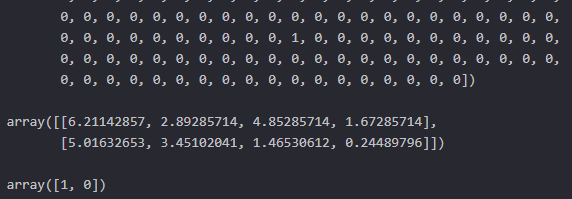

In [64]:
Image("meanshift.png")

Poiché lo spostamento medio è un algoritmo basato sui centroidi, l'oggetto `MeanShift` contiene l'attributo `cluster_centers_` (i centroidi finali) e la funzione `predict`.

## DBSCAN
### Clustering by density
L'algoritmo di `Mean Shift Clustering` del capitolo precedente di solito funziona sufficientemente bene e può scegliere un numero ragionevole di cluster. Tuttavia, non è molto scalabile a causa del tempo di calcolo e presuppone ancora che i cluster abbiano una forma simile a un "blob" (sebbene questa ipotesi non sia forte come quella fatta da K-mean).
- Un altro algoritmo di clustering che sceglie automaticamente anche il numero di cluster è `DBSCAN`. DBSCAN raggruppa i dati trovando regioni dense nel set di dati. 
- Le regioni nel set di dati con **molte osservazioni di dati** ravvicinate sono considerate regioni ad `alta densità`, 
- mentre le regioni con **dati sparsi** sono considerate regioni a `bassa densità`.

L'algoritmo DBSCAN tratta le regioni ad alta densità come cluster nel set di dati e le regioni a bassa densità come l'area tra i cluster (quindi le osservazioni nelle regioni a bassa densità vengono trattate come rumore e non collocate in un cluster).

Le regioni ad alta densità sono definite da campioni di base, che sono solo osservazioni di dati con molti vicini. 
- Ogni cluster è costituito da diversi campioni principali e tutte le osservazioni vicine a un campione principale.

A differenza dell'algoritmo di spostamento medio, l'algoritmo DBSCAN è altamente scalabile e non fa ipotesi sulla forma sottostante dei cluster nel set di dati.

### Neighbors and core samples
La definizione esatta di `"neighbor"` e `"core sample"` dipende da ciò che vogliamo nei nostri cluster. 
Si specifica la distanza massima, `ε`, tra due osservazioni di dati che sono considerate vicine. 
- Distanze minori si traducono in ammassi più piccoli e più fitti. Specifichiamo anche il numero minimo di punti nell'intorno di un'osservazione dei dati affinché l'osservazione possa essere considerata un campione centrale (l'intorno è costituito dall'osservazione dei dati e da tutti i suoi vicini).

In scikit-learn, si implementa `DBSCAN` con l'oggetto `DBSCAN` (parte del modulo `cluster`). L'oggetto viene inizializzato con gli argomenti della keyword `eps` (che rappresenta il valore di ε) e `min_samples` (che rappresenta la dimensione minima dell'intorno di un campione principale).
- Il codice seguente mostra come utilizzare l'oggetto `DBSCAN`, con `ε` uguale a 1,2 e una dimensione minima di 30 per le vicinanze di un campione principale.

In [65]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=1.2, min_samples=30)

## predefined data
# dbscan.fit(data)

In [66]:
## cluster assignments
# print('{}\n'.format(repr(dbscan.labels_)))

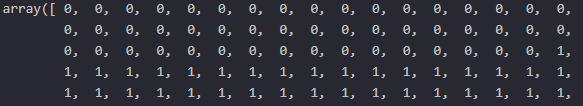

In [70]:
Image("dbscanlabels.png")

In [67]:
## core samples
# print('{}\n'.format(repr(dbscan.core_sample_indices_)))

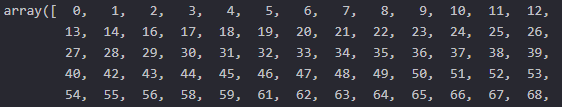

In [71]:
Image("dbscanindices.png")

In [68]:
# num_core_samples = len(dbscan.core_sample_indices_)
# print('Num core samples: {}\n'.format(num_core_samples))

In [73]:
Image("dbscannumcore.png")

Nel codice sopra, si utilizza:
- `DBSCAN` per raggruppare le 150 osservazioni di dati in `data`. L'algoritmo ha trovato due cluster. In questo caso tutte le osservazioni dei dati rientrano in un cluster, ma in generale le osservazioni non cluster verrebbero etichettate con -1.
- L'attributo `core_sample_indices_` rappresenta le osservazioni dei dati di esempio principali in `data` (specificati dall'indice di riga).

## Evaluating Clusters
### Evaluation metrics
Quando non abbiamo accesso a nessuna vera assegnazione di cluster (etichette), il meglio che si può fare per valutare i cluster è semplicemente dare un'occhiata e vedere se hanno senso rispetto al set di dati e al dominio. Tuttavia, se si ha accesso alle vere etichette dei cluster per le osservazioni dei dati, possiamo applicare una serie di metriche per valutare il nostro algoritmo di clustering.
<br><br>
Una metrica di valutazione popolare è `l'indice Rand rettificato`. L'indice Rand regolare fornisce una misura della somiglianza tra le assegnazioni di clustering reali (etichette vere) e le assegnazioni di clustering previste (etichette previste). L'indice Rand aggiustato (ARI) è una versione corretta per caso di quello normale, il che significa che il punteggio viene aggiustato in modo che le assegnazioni di clustering casuali non abbiano un buon punteggio.
<br><br>
Il valore ARI varia da **-1 a 1**, inclusi. I punteggi negativi rappresentano `etichette errate`, le `etichette casuali` otterranno un punteggio vicino a **0** e le `etichette perfette` ottengono un punteggio di **1**.
<br><br>
In scikit-learn, ARI viene implementato tramite la funzione ``adjusted_rand_score` (parte del modulo delle `metrics`). Accetta due argomenti obbligatori, le etichette cluster reali e le etichette cluster previste e restituisce il punteggio ARI.

In [76]:
from sklearn.metrics import adjusted_rand_score
true_labels = np.array([0, 0, 0, 1, 1, 1])
pred_labels = np.array([0, 0, 1, 1, 2, 2])

In [77]:
ari = adjusted_rand_score(true_labels, pred_labels)
print('{}\n'.format(ari))

0.24242424242424243



In [78]:
# symmetric
ari = adjusted_rand_score(pred_labels, true_labels)
print('{}\n'.format(ari))

0.24242424242424243



In [79]:
# Perfect labeling
perf_labels = np.array([0, 0, 0, 1, 1, 1])
ari = adjusted_rand_score(true_labels, perf_labels)
print('{}\n'.format(ari))

1.0



In [80]:
# Perfect labeling, permuted
permuted_labels = np.array([1, 1, 1, 0, 0, 0])
ari = adjusted_rand_score(true_labels, permuted_labels)
print('{}\n'.format(ari))

1.0



In [81]:
renamed_labels = np.array([1, 1, 1, 3, 3, 3])
# Renamed labels to 1, 3
ari = adjusted_rand_score(true_labels, renamed_labels)
print('{}\n'.format(ari))

1.0



In [82]:
true_labels2 = np.array([0, 1, 2, 0, 3, 4, 5, 1])
# Bad labeling
pred_labels2 = np.array([1, 1, 0, 0, 2, 2, 2, 2])
ari = adjusted_rand_score(true_labels2, pred_labels2)
print('{}\n'.format(ari))

-0.12903225806451613



Si noti che la funzione `adjusted_rand_score` è simmetrica. Ciò significa che la modifica dell'ordine degli argomenti non influirà sul punteggio. 
- Inoltre, le permutazioni nell'etichettatura o la modifica dei nomi delle etichette (cioè 0 e 1 contro 1 e 3) non influiscono sul punteggio.

Un'altra metrica di valutazione del clustering comune è l'informazione reciproca modificata (`AMI`: adjusted mutual information). È implementato in scikit-learn con la funzione `adjusted_mutual_info_score` (anch'essa parte del modulo `cluster`). Come `adjusted_rand_score`, la funzione è simmetrica e ignara delle permutazioni e delle etichette rinominate.

In [83]:
from sklearn.metrics import adjusted_mutual_info_score
true_labels = np.array([0, 0, 0, 1, 1, 1])
pred_labels = np.array([0, 0, 1, 1, 2, 2])

In [84]:
ami = adjusted_mutual_info_score(true_labels, pred_labels)
print('{}\n'.format(ami))

0.2987924581708901



In [85]:
# symmetric
ami = adjusted_mutual_info_score(pred_labels, true_labels)
print('{}\n'.format(ami))

0.2987924581708903



In [86]:
# Perfect labeling
perf_labels = np.array([0, 0, 0, 1, 1, 1])
ami = adjusted_mutual_info_score(true_labels, perf_labels)
print('{}\n'.format(ami))

1.0



In [87]:
# Perfect labeling, permuted
permuted_labels = np.array([1, 1, 1, 0, 0, 0])
ami = adjusted_mutual_info_score(true_labels, permuted_labels)
print('{}\n'.format(ami))

1.0



In [88]:
renamed_labels = np.array([1, 1, 1, 3, 3, 3])
# Renamed labels to 1, 3
ami = adjusted_mutual_info_score(true_labels, renamed_labels)
print('{}\n'.format(ami))

1.0



In [89]:
true_labels2 = np.array([0, 1, 2, 0, 3, 4, 5, 1])
# Bad labeling
pred_labels2 = np.array([1, 1, 0, 0, 2, 2, 2, 2])
ami = adjusted_mutual_info_score(true_labels2, pred_labels2)
print('{}\n'.format(ami))

-0.16666666666666655



Le metriche ARI e AMI sono molto simili. Entrambi assegnano un punteggio di 1,0 alle etichette perfette, un punteggio vicino a 0,0 alle etichette casuali e punteggi negativi alle etichette scadenti.

Una regola pratica generale su quando utilizzare quale: ARI viene utilizzato quando i veri cluster sono grandi e di dimensioni approssimativamente uguali, mentre AMI viene utilizzato quando i veri cluster sono di dimensioni sbilanciate ed esistono piccoli cluster.

Le metriche ARI e AMI sono molto simili. Entrambe assegnano un punteggio di 1,0 alle etichettature perfette, un punteggio vicino allo 0,0 alle etichettature casuali e punteggi negativi alle etichettature scadenti.

Una regola generale su quando utilizzarle è la seguente: `ARI` si usa quando i cluster veri sono **grandi** e approssimativamente di **dimensioni uguali**, mentre `AMI` si usa quando i cluster veri sono **sbilanciati** nelle **dimensioni** e ci sono **cluster piccoli**

## Feature Clustering
### Agglomerative feature clustering
Nella sezione **Preelaborazione dei dati**, abbiamo utilizzato la PCA per ridurre la dimensionalità delle caratteristiche sui set di dati. 
- È possibile ridurre la dimensionalità delle caratteristiche anche utilizzando il clustering agglomerativo. Unendo le caratteristiche comuni in cluster, si riduce il numero di caratteristiche totali, pur mantenendo la maggior parte delle informazioni originali del set di dati.

In scikit-learn, eseguiamo il clustering agglomerativo sulle caratteristiche utilizzando l'oggetto `FeatureAgglomeration` (parte del modulo `cluster`). Quando si inizializza l'oggetto, l'argomento della keyword `n_clusters` (che rappresenta il numero di cluster finali) viene utilizzato per specificare la nuova dimensione delle caratteristiche dei dati.

Il codice seguente mostra come utilizzare l'oggetto `FeatureAgglomeration` per ridurre la dimensionalità delle caratteristiche da 4 a 2. Si utilizza la funzione `fit_transform` dell'oggetto per adattare il modello di clustering ai dati, quindi si applica la riduzione delle caratteristiche ai dati.

In [90]:
## predefined data
# print('Original shape: {}\n'.format(data.shape))
# print('First 10:\n{}\n'.format(repr(data[:10])))

# from sklearn.cluster import FeatureAgglomeration
# agg = FeatureAgglomeration(n_clusters=2)
# new_data = agg.fit_transform(data)

# print('New shape: {}\n'.format(new_data.shape))
# print('First 10:\n{}\n'.format(repr(new_data[:10])))

dabd